In [47]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = "/content/drive/MyDrive/Machine Project/Motor_Vehicle_Collisions_Queens.csv"
df = pd.read_csv(file_path)
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/01/2024,6:00,QUEENS,11416.0,40.685920,-73.846924,"(40.68592, -73.846924)",97 AVENUE,WOODHAVEN BOULEVARD,NaN,...,NaN,NaN,NaN,NaN,4691952,Sedan,NaN,NaN,NaN,NaN
1,01/01/2024,5:57,QUEENS,11434.0,40.672382,-73.785740,"(40.672382, -73.78574)",BAISLEY BOULEVARD,ROCKAWAY BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4691606,E-Scooter,DELIVERY T,NaN,NaN,NaN
2,01/01/2024,15:38,QUEENS,11378.0,40.732250,-73.924520,"(40.73225, -73.92452)",54 AVENUE,43 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4692223,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,01/01/2024,6:10,QUEENS,11434.0,40.678970,-73.759850,"(40.67897, -73.75985)",MERRICK BOULEVARD,BELKNAP STREET,NaN,...,NaN,NaN,NaN,NaN,4691645,Sedan,NaN,NaN,NaN,NaN
4,01/01/2024,2:27,QUEENS,11378.0,40.722267,-73.901340,"(40.722267, -73.90134)",NaN,NaN,57-11 64 STREET,...,Unspecified,NaN,NaN,NaN,4691680,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21836,03/31/2025,18:49,QUEENS,11356.0,40.781690,-73.842310,"(40.78169, -73.84231)",20 AVE,126 ST,NaN,...,NaN,NaN,NaN,NaN,4804041,Sedan,NaN,NaN,NaN,NaN
21837,03/31/2025,16:18,QUEENS,11420.0,40.663860,-73.822960,"(40.66386, -73.82296)",NASSAU EXPY,LEFFERTS BLVD,NaN,...,NaN,NaN,NaN,NaN,4803897,Sedan,NaN,NaN,NaN,NaN
21838,03/31/2025,16:15,QUEENS,11427.0,40.737167,-73.740160,"(40.737167, -73.74016)",GRAND CENTRAL PARKWAY,STRONGHURST AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4803496,Sedan,Sedan,NaN,NaN,NaN
21839,03/31/2025,18:50,QUEENS,11373.0,40.744186,-73.884796,"(40.744186, -73.884796)",NaN,NaN,80-08 BAXTER AVE,...,Unspecified,NaN,NaN,NaN,4803947,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


# Data Cleaning

In [48]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [49]:
df.isnull().sum()


,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,0
ZIP CODE,18
LATITUDE,176
LONGITUDE,176
LOCATION,176
ON STREET NAME,7676
CROSS STREET NAME,7686
OFF STREET NAME,14165


Dropping unnecessary columns

In [50]:
df.drop(columns=['NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5','OFF STREET NAME','CROSS STREET NAME','ON STREET NAME'], inplace=True)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21647 entries, 0 to 21840
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     21647 non-null  object 
 1   CRASH TIME                     21647 non-null  object 
 2   BOROUGH                        21647 non-null  object 
 3   ZIP CODE                       21647 non-null  float64
 4   LATITUDE                       21647 non-null  float64
 5   LONGITUDE                      21647 non-null  float64
 6   LOCATION                       21647 non-null  object 
 7   NUMBER OF PERSONS INJURED      21647 non-null  int64  
 8   NUMBER OF PERSONS KILLED       21647 non-null  int64  
 9   CONTRIBUTING FACTOR VEHICLE 1  21647 non-null  object 
 10  COLLISION_ID                   21647 non-null  int64  
 11  VEHICLE TYPE CODE 1            21278 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 2.

In [56]:
df.isnull().sum()


,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,0
ZIP CODE,0
LATITUDE,0
LONGITUDE,0
LOCATION,0
NUMBER OF PERSONS INJURED,0
NUMBER OF PERSONS KILLED,0
CONTRIBUTING FACTOR VEHICLE 1,0


Handling Missing Value

In [67]:
#drop missing values from zip code
df.dropna(subset=['ZIP CODE','LATITUDE', 'LONGITUDE', 'LOCATION'], inplace=True)

In [68]:
df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified', inplace=True)

<ipython-input-68-b6d4008cdd9a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified', inplace=True)


In [69]:

most_common_vehicle = df['VEHICLE TYPE CODE 1'].mode()[0]

df['VEHICLE TYPE CODE 1'].fillna(most_common_vehicle, inplace=True)

print(f"Missing 'VEHICLE TYPE CODE 1' filled with: {most_common_vehicle}")


Missing 'VEHICLE TYPE CODE 1' filled with: Sedan


<ipython-input-69-427f4f2ddf46>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VEHICLE TYPE CODE 1'].fillna(most_common_vehicle, inplace=True)


In [73]:
df.isnull().sum()

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,0
ZIP CODE,0
LATITUDE,0
LONGITUDE,0
LOCATION,0
NUMBER OF PERSONS INJURED,0
NUMBER OF PERSONS KILLED,0
CONTRIBUTING FACTOR VEHICLE 1,0


adding h/d/m to df

In [78]:
#one date time
df['CRASH_DATETIME'] = pd.to_datetime(df['CRASH DATE'] + ' ' + df['CRASH TIME'],
                                      format='%m/%d/%Y %H:%M', errors='coerce')

df['hour'] = df['CRASH_DATETIME'].dt.hour
df['day'] = df['CRASH_DATETIME'].dt.dayofweek # 0 = Monday, 6 = Sunday
df['month'] = df['CRASH_DATETIME'].dt.month
#drop originaaall
df.drop(columns=['CRASH DATE', 'CRASH TIME'], inplace=True)

df

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CRASH_DATETIME,hour,day,month
0,QUEENS,11416.0,40.685920,-73.846924,"(40.68592, -73.846924)",0,0,Unspecified,4691952,Sedan,2024-01-01 06:00:00,6,0,1
1,QUEENS,11434.0,40.672382,-73.785740,"(40.672382, -73.78574)",1,0,Unsafe Speed,4691606,E-Scooter,2024-01-01 05:57:00,5,0,1
2,QUEENS,11378.0,40.732250,-73.924520,"(40.73225, -73.92452)",0,0,Failure to Yield Right-of-Way,4692223,Station Wagon/Sport Utility Vehicle,2024-01-01 15:38:00,15,0,1
3,QUEENS,11434.0,40.678970,-73.759850,"(40.67897, -73.75985)",0,0,Unsafe Speed,4691645,Sedan,2024-01-01 06:10:00,6,0,1
4,QUEENS,11378.0,40.722267,-73.901340,"(40.722267, -73.90134)",0,0,Unsafe Speed,4691680,Station Wagon/Sport Utility Vehicle,2024-01-01 02:27:00,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21836,QUEENS,11356.0,40.781690,-73.842310,"(40.78169, -73.84231)",0,0,Unspecified,4804041,Sedan,2025-03-31 18:49:00,18,0,3
21837,QUEENS,11420.0,40.663860,-73.822960,"(40.66386, -73.82296)",1,0,Brakes Defective,4803897,Sedan,2025-03-31 16:18:00,16,0,3
21838,QUEENS,11427.0,40.737167,-73.740160,"(40.737167, -73.74016)",1,0,Brakes Defective,4803496,Sedan,2025-03-31 16:15:00,16,0,3
21839,QUEENS,11373.0,40.744186,-73.884796,"(40.744186, -73.884796)",0,0,Driver Inexperience,4803947,Station Wagon/Sport Utility Vehicle,2025-03-31 18:50:00,18,0,3


In [79]:
cleaned_path = "/content/drive/MyDrive/Machine Project/nyc_queens_collisions_cleaned.csv"
df.to_csv(cleaned_path, index=False)
print("Cleeaned")


Cleeaned


# Visualizations

Hourly collisions

<ipython-input-81-c1c865a3b2ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hour', palette='coolwarm')


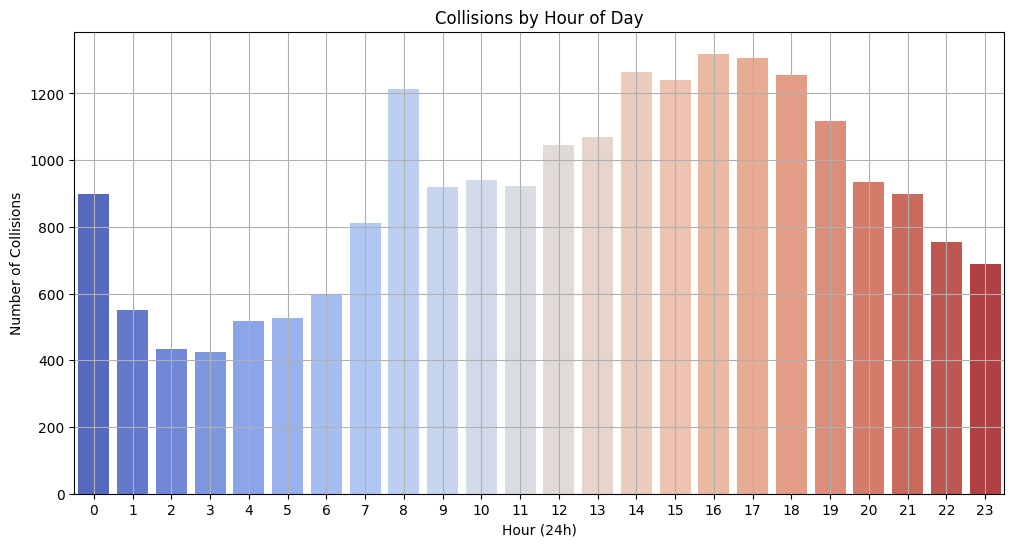

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='hour', palette='coolwarm')
plt.title('Collisions by Hour of Day')
plt.xlabel('Hour (24h)')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.show()


weekly collisions

<ipython-input-83-d5b950d3a0f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day', order=range(7), palette='viridis')


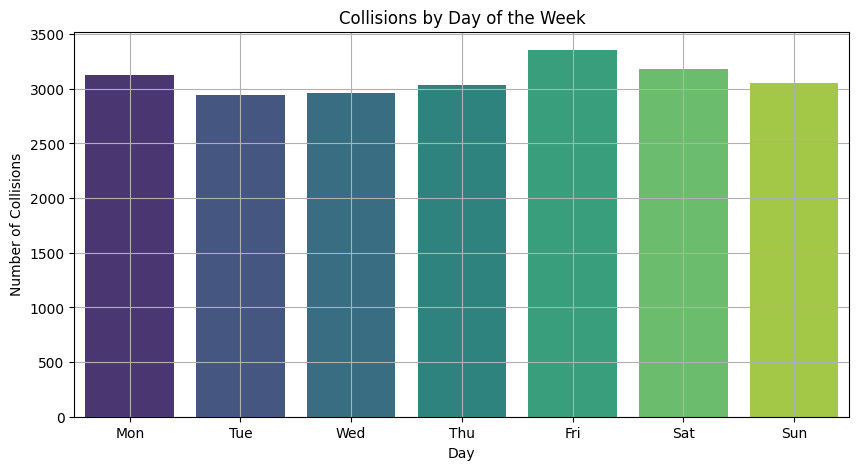

In [83]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day', order=range(7), palette='viridis')
plt.title('Collisions by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Collisions')
plt.xticks(ticks=range(7), labels=days)
plt.grid(True)
plt.show()
#nearly the same rate of weekly collisions